In [1]:
import glob,os,cv2
import rasterio as rio
import geopandas as gpd
import numpy as np
from rasterio.plot import reshape_as_image,reshape_as_raster
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
training_path = "Input/data_dec_1_2023/patches/"
training_normalised_path = "Input/data_dec_1_2023/patches/normalised_patches/"
# import warnings
# warnings.filterwarnings("ignore")

# Get cut-down GDAL that rasterio uses
from osgeo import gdal
# ... and suppress errors
gdal.PushErrorHandler('CPLQuietErrorHandler')
# training_normalised_path2 = "Input/sentinel/test_data_from_drive/patches_all/normalised_test_v2/"
target_file_path = "Input/Target/concat/target_yield.shp"
patch_dim = (256, 256, 15)


In [1]:
# training_file_list = glob.glob(os.path.join(training_path,"*.tif"))
# target_gdf = gpd.read_file(target_file_path)
# print("Total Number of Patches:",len(training_file_list))
# ignore_patch_list1 = list()
# ignore_patch_list2 = list()

# ignore_patch_list3 = list()
# file_name = list()
# count = 0
# x = list()
# y = list()
# for file in training_file_list:
    
    
    
#     patch_src = rio.open(file)
    
    
#     patch_src_read_norm = list()
#     f_name = file.split("/")[-1].split(".")[0]
#     year = f_name.split("_")[1]
#     patch_src_read = reshape_as_image(patch_src.read()) ## Change the index here to add or remove the mask layer
#     # print(f_name,patch_src_read.shape)
#     # if patch_src_read.shape != patch_dim:
#     #     # ignore_patch_list1.append(f_name)
#     #     # print("Patch Dimensions Mismatch, skipping patch : {}".format(f_name))
#     #     continue
#     # print(1)
#     # break
#     if np.isnan(patch_src_read).any():
#         # ignore_patch_list2.append(f_name)
#         # print("Has Nan values, skipping patch : {}".format(f_name))
#         continue
#     # print(2)
#     # query = target_gdf.query(f"patch_name == '{f_name}'")["ykg_by_e7"]
#     # if len(query) != 1:
#     #     ignore_patch_list3.append(f_name)
#     #     # print("patch has no target value, skipping patch : {}".format(f_name))
#     #     continue
#     # print(patch_src_read.shape)
#     file_name.append(f_name)
#     # Just get blue (Band 2- index 1), NIR (Band 8 - index 7) and SWIR  (Band 11 - index10) 
#     # since they are the ones used to monitor healthy crops in agriculture
#     # blue_to_nir_bands = patch_src_read[:,:,1:9]
#     # nir_band = patch_src_read[:,:,7]
#     # swir_bands = patch_src_read[:,:,10:12]
    
#     # patch_agri_bands = np.dstack((blue_to_nir_bands,swir_bands))
#     # patch_agri_bands = np.dstack(
    
#     # x.append(patch_src_read[:,:,1])
#     sent_TOA = [2016,2017,2018]
#     if int(year) in sent_TOA:
#         img1 = patch_src_read[:,:,0:10]
#         img2 = patch_src_read[:,:,11:13]
#         img3 = patch_src_read[:,:,14:16]
#         img_original = np.dstack((img1,img2,img3))
#         img = cv2.resize(img_original, dsize=(789, 789), interpolation=cv2.INTER_LINEAR)

#     else:
#         img1 = patch_src_read[:,:,0:12]
#         img2 = patch_src_read[:,:,13:15]

#         img_original = np.dstack((img1,img2))
#         img = cv2.resize(img_original, dsize=(789, 789), interpolation=cv2.INTER_LINEAR)
#     # print(img.shape)
#     x.append(img)

#     y.append(patch_src_read[:,:,12])
#     # for band_no in range(0,12):
#     #     scaler = MinMaxScaler(feature_range=(0, 1))
#     #     scaler.fit(patch_src_read[:,:,band_no])
#     #     patch_src_read_norm.append(scaler.transform(patch_src_read[:,:,band_no]))
#     # patch_src_read_norm.append(patch_src.read()[12,:,:])
#     # patch_src_read_norm = np.array(patch_src_read_norm)
#     # print(patch_src_read_norm.shape)
#     # print("Minimum: ",patch_src_read_norm.min())
#     # print("Maximum: ",patch_src_read_norm.max())
#     patch_src.close()
#     # print(count)
#     # outpath = training_normalised_path+"/"+f_name+".tif"
#     # meta = patch_src.meta.copy()
#     # with rio.open(outpath, 'w', **meta) as outds:
#     #     outds.write(patch_src_read_norm)
#     count +=1
#     # if count > 5:
#     #     break
# y = np.array(y)
# y = np.expand_dims(y,-1)
# x = np.array(x)

# # x = (x-np.min(x))/(np.max(x)-np.min(x))
# print("Any Null values? ",np.isnan(x).any())
# # print(self.y)
# # self.x = np.nan_to_num(self.x, nan=0)# Check for different value for no data
# print(f"x shape :{x.shape}, y shape: {y.shape}")
# # print(np.nanmin(self.x),np.nanmax(self.x))
# # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
training_file_list = glob.glob(os.path.join(training_path,"*.tif"))
target_gdf = gpd.read_file(target_file_path)
print("Total Number of Patches:",len(training_file_list))
ignore_patch_list1 = list()
ignore_patch_list2 = list()

ignore_patch_list3 = list()
file_name = list()
count = 0
x = list()
y = list()
for file in training_file_list:
    
    
    try:
        patch_src = rio.open(file)
    except Exception as ee:
        print(ee)
        continue
    
    patch_src_read_norm = list()
    f_name = file.split("/")[-1].split(".")[0]
    year = f_name.split("_")[1]
    patch_src_read = reshape_as_image(patch_src.read()) ## Change the index here to add or remove the mask layer
  
    if np.isnan(patch_src_read).any():
        continue
    file_name.append(f_name)
    sent_TOA = [2016,2017,2018]
    if int(year) in sent_TOA:
        img1 = patch_src_read[:,:,0:10]
        img2 = patch_src_read[:,:,11:13]
        img3 = patch_src_read[:,:,14:16]
        img_original = np.dstack((img1,img2,img3))
        img = cv2.resize(img_original, dsize=(789, 789), interpolation=cv2.INTER_LINEAR)

    else:
        img1 = patch_src_read[:,:,0:12]
        img2 = patch_src_read[:,:,13:15]

        img_original = np.dstack((img1,img2))
        img = cv2.resize(img_original, dsize=(789, 789), interpolation=cv2.INTER_LINEAR)
    # print(img.shape)
    x.append(img)

    y.append(patch_src_read[:,:,12])
 
    patch_src.close()
    count +=1

y = np.array(y)
y = np.expand_dims(y,-1)
x = np.array(x)

print("Any Null values? ",np.isnan(x).any())
print(f"x shape :{x.shape}, y shape: {y.shape}")


Total Number of Patches: 31374
'Input/data_dec_1_2023/patches/Illinois_2017_july_1280-4096.tif' not recognized as a supported file format.
'Input/data_dec_1_2023/patches/Indiana_2020_july_4352-4352.tif' not recognized as a supported file format.


In [2]:
y

NameError: name 'y' is not defined

In [ ]:
x.max()

In [ ]:
x.min()

In [ ]:
x = (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
print("x shape:",x.shape)
print("min:", x.min())
print("max:", x.max())

In [11]:
x[2,:,:,2].min()

0.016962098

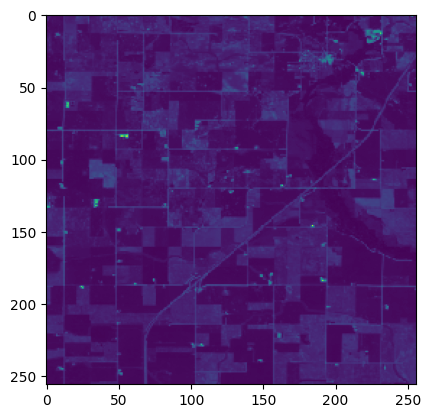

In [12]:
plt.imshow(x[2,:,:,0])

In [13]:
len(file_name)

14370

In [ ]:
patch_dict = dict()
count = 0
for patch_no in range(x.shape[0]):
    patches = np.dstack((x[patch_no],y[patch_no]))
    patch_dict[file_name[patch_no]] = patches
    count+=1
    # if count > 10:
    #     break

In [32]:
# patch_dict.keys()

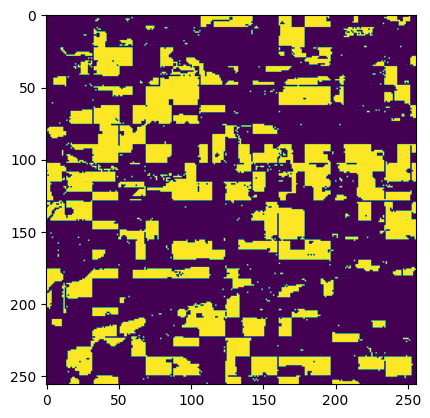

In [20]:
import matplotlib.pyplot as plt
plt.imshow(patch_dict["Iowa_2019_july_5632-512"][:,:,10])

In [63]:
# patch_dict

In [ ]:
training_file_list = glob.glob(os.path.join(training_path,"*.tif"))
target_gdf = gpd.read_file(target_file_path)
print("Total Number of Patches:",len(patch_dict))
ignore_patch_list = list()
file_name = list()
count = 0
for f_name,patch in patch_dict.items():
    
    file = glob.glob(training_path+f_name+".tif")[0]
    patch_src = rio.open(file)
    outpath = training_normalised_path+"/"+f_name+".tif"
    meta = patch_src.meta.copy()
    meta.update(count=11)
    with rio.open(outpath, 'w', **meta) as outds:
        outds.write(reshape_as_raster(patch_dict[f_name]))
    count+=1
    # if count > 10:
    #     break
print("Done")

In [ ]:
   #
    patch_src_read_norm.append(patch_src.read()[12,:,:])
    # patch_src_read_norm = np.array(patch_src_read_norm)
    # print(patch_src_read_norm.shape)
    # print("Minimum: ",patch_src_read_norm.min())
    # print("Maximum: ",patch_src_read_norm.max())
    patch_src.close()
    # print(count)
    outpath = training_normalised_path+"/"+f_name+".tif"
    meta = patch_src.meta.copy()
    # with rio.open(outpath, 'w', **meta) as outds:
    #     outds.write(patch_src_read_norm)